In [24]:
import os
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import torch
import glob
from collections import defaultdict

<IPython.core.display.Javascript object>

In [25]:
# Pretty plots
%matplotlib inline
%config InlineBackend.figure_format='retina'
%config IPCompleter.greedy=True

import seaborn as sns
sns.set(font_scale=2)
sns.set_style('ticks')

plt.rcParams["axes.facecolor"] = "white"
plt.rcParams["figure.facecolor"] = "white"
plt.rcParams["font.size"] = "14"
plt.rcParams["legend.title_fontsize"] = "14"
# Uncomment for local development
%load_ext nb_black
%load_ext autoreload
%autoreload 2

The nb_black extension is already loaded. To reload it, use:
  %reload_ext nb_black
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


<IPython.core.display.Javascript object>

Shared fns

In [26]:
def get_data(files, *keys):
    """Get data keys from saved digit exps."""
    data = defaultdict(list)
    for f in files:
        d = torch.load(f)
        for k in keys:
           data[k].append(d[k]) 
        
    return data

<IPython.core.display.Javascript object>

In [27]:
def load_digit_online_exps():
    # Get
    files = glob.glob("/Users/qualia/Code/glia_playing_atari/data/digits_exp151_*") 
    exp151 = get_data(files, "correct")

    files = glob.glob("/Users/qualia/Code/glia_playing_atari/data/digits_exp152_*") 
    exp152 = get_data(files, "correct")

    # Gather
    models = [exp151, exp152]
    model_names = ["Astrocytes", "Neurons"]

    # Sanity
    assert len(model_names) == len(models)

    return model_names, models

<IPython.core.display.Javascript object>

In [28]:
    
def load_digit_pretrain_exps():        
    # Pretrain VAE (fixed for all exps)
    files = glob.glob("/Users/qualia/Code/glia_playing_atari/data/digits_exp153_*") 
    exp153 = get_data(files, "correct")

    files = glob.glob("/Users/qualia/Code/glia_playing_atari/data/digits_exp154_*") 
    exp154 = get_data(files, "correct")

    # Gather
    models = [exp153, exp154]
    model_names = ["Astrocytes", "Neurons"]

    # Sanity
    assert len(model_names) == len(models)

    return model_names, models

<IPython.core.display.Javascript object>

In [29]:
def load_digit_rand_exps():  
# Sparse projection
    files = glob.glob("/Users/qualia/Code/glia_playing_atari/data/digits_exp155_*") 
    exp155 = get_data(files, "correct")

    files = glob.glob("/Users/qualia/Code/glia_playing_atari/data/digits_exp156_*") 
    exp156 = get_data(files, "correct")

    # Gather
    models = [exp155, exp156]
    model_names = ["Astrocytes", "Neurons"]

    # Sanity
    assert len(model_names) == len(models)

    return model_names, models

<IPython.core.display.Javascript object>

# Learn VAE 

Load data

In [30]:
model_names, models = load_digit_online_exps()
# Show example
i = 0
model_names[i], models[i]

('Astrocytes',
 defaultdict(list,
             {'correct': [0.8348,
               0.1135,
               0.1135,
               0.1135,
               0.8002,
               0.1135,
               0.8765,
               0.7719,
               0.8828,
               0.1135,
               0.8593,
               0.8646,
               0.8862,
               0.8506,
               0.1135,
               0.867,
               0.8815,
               0.8798,
               0.1135,
               0.8375]}))

<IPython.core.display.Javascript object>

Est stats and plot

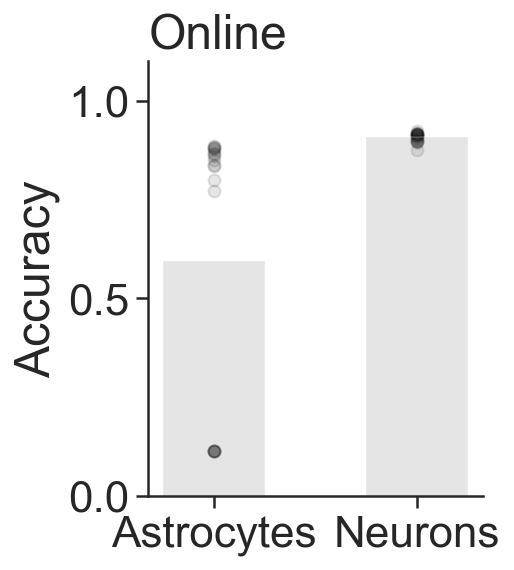

<IPython.core.display.Javascript object>

In [31]:
# Est
means = [np.mean(exp["correct"]) for exp in models]
stds = [np.std(exp["correct"]) for exp in models]
medians = [np.median(exp["correct"]) for exp in models]
assert len(means) == len(models)

# Plot grid
fig = plt.figure(figsize=(3, 4))
grid = plt.GridSpec(1, 1, wspace=0.3, hspace=0.8)
plt.subplot(grid[0, 0])

# Mean
plt.bar(model_names, means, color="grey", alpha=0.2, width=0.5)

# Points
for name, model in zip(model_names, models):
    n = len(model["correct"])
    plt.scatter(x=np.repeat(name, n), y=model["correct"], color="black", alpha=0.1)

# Axes
plt.ylim(0, 1.1)
plt.ylabel("Accuracy")
plt.title("Online", loc="left")
_ = sns.despine()

# Fixed VAE

In [32]:
model_names, models = load_digit_pretrain_exps()
# Show example
i = 0
model_names[i], models[i]

('Astrocytes',
 defaultdict(list,
             {'correct': [0.8357,
               0.1135,
               0.8122,
               0.8222,
               0.1135,
               0.1135,
               0.8242,
               0.8198,
               0.7776,
               0.8245,
               0.828,
               0.8182,
               0.8075,
               0.8196,
               0.8279,
               0.8216,
               0.8285,
               0.8197,
               0.8302,
               0.8183]}))

<IPython.core.display.Javascript object>

Est stats and plot

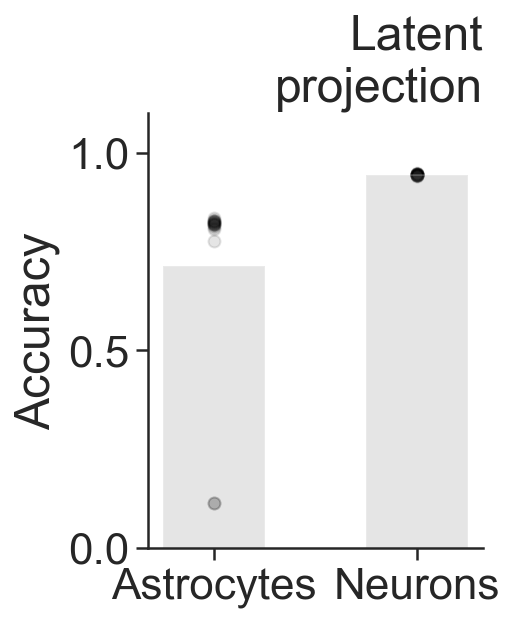

<IPython.core.display.Javascript object>

In [33]:
# Est
means = [np.mean(exp["correct"]) for exp in models]
stds = [np.std(exp["correct"]) for exp in models]
medians = [np.median(exp["correct"]) for exp in models]
assert len(means) == len(models)

# Plot grid
fig = plt.figure(figsize=(3, 4))
grid = plt.GridSpec(1, 1, wspace=0.3, hspace=0.8)
plt.subplot(grid[0, 0])

# Mean
plt.bar(model_names, means, color="grey", alpha=0.2, width=0.5)

# Points
for name, model in zip(model_names, models):
    n = len(model["correct"])
    plt.scatter(x=np.repeat(name, n), y=model["correct"], color="black", alpha=0.1)

# Axes
plt.ylim(0, 1.1)
plt.ylabel("Accuracy")
plt.title("Latent\nprojection", loc="right")
_ = sns.despine()

# Sparse projection

In [34]:
model_names, models = load_digit_rand_exps()
# Show example
i = 0
model_names[i], models[i]

('Astrocytes',
 defaultdict(list,
             {'correct': [0.65,
               0.6698,
               0.6726,
               0.687,
               0.6786,
               0.6645,
               0.7206,
               0.6784,
               0.6683,
               0.6844,
               0.6876,
               0.5402,
               0.6789,
               0.6847,
               0.6808,
               0.6459,
               0.679,
               0.6791,
               0.6695,
               0.6871]}))

<IPython.core.display.Javascript object>

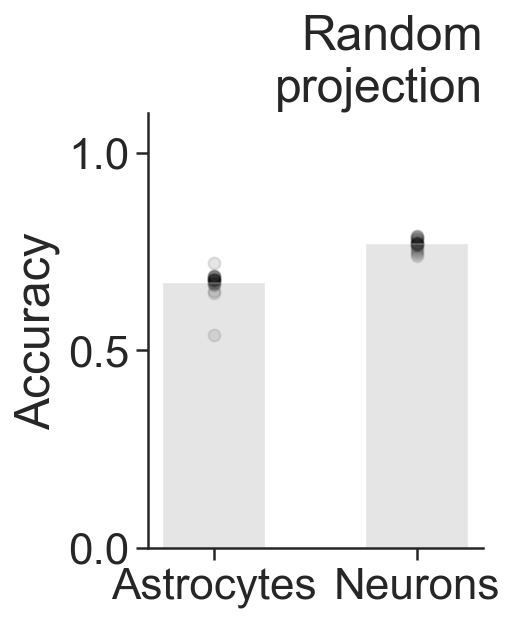

<IPython.core.display.Javascript object>

In [35]:
# Est
means = [np.mean(exp["correct"]) for exp in models]
stds = [np.std(exp["correct"]) for exp in models]
medians = [np.median(exp["correct"]) for exp in models]
assert len(means) == len(models)

# Plot grid
fig = plt.figure(figsize=(3, 4))
grid = plt.GridSpec(1, 1, wspace=0.3, hspace=0.8)
plt.subplot(grid[0, 0])

# Mean
plt.bar(model_names, means, color="grey", alpha=0.2, width=0.5)

# Points
for name, model in zip(model_names, models):
    n = len(model["correct"])
    plt.scatter(x=np.repeat(name, n), y=model["correct"], color="black", alpha=0.1)

# Axes
plt.ylim(0, 1.1)
plt.ylabel("Accuracy")
plt.title("Random\nprojection", loc="right")
_ = sns.despine()